/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


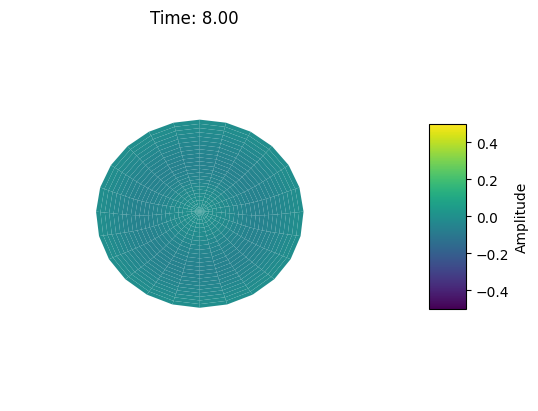

In [ ]:
# 2D_Classical_Wave_Simulation
# This code simulates the time evolution of a two-dimensional classical wave in a specific medium. It demonstrates wave dynamics and interference patterns using numerical methods.
# The script begins by importing necessary libraries: numpy for numerical calculations and matplotlib for visualization and animation.
# Key parameters and constants are defined, such as wave speed (c), grid size (N), time step (dt), and initial conditions for the wave.
# A spatial grid is generated using numpy's linspace and meshgrid functions. The script also prepares for the wave propagation in this defined space.
# The initial wave configuration is set up, potentially including multiple wave sources or specific initial disturbances in the medium.
# The script defines the wave propagation rules, accounting for the medium's properties and boundary conditions, if any.
# A function for updating the wave state is created, which calculates the wave's new position at each time step according to the wave equation.
# The visualization setup includes creating a figure with a subplot for the wave and configuring the plot's appearance, like titles and labels.
# An update function for the animation is defined, which refreshes the wave visualization at each frame, showing its evolution over time.
# An animation is created using FuncAnimation from matplotlib, calling the update function iteratively to demonstrate the wave's dynamics.
# The script may include an option to save the animation, using a writer like FFMpegWriter, which specifies properties such as frame rate and resolution and saves the animation as a video file.
# Overall, this script provides a visual and interactive representation of classical wave dynamics, offering insights into wave behavior in various scenarios.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from scipy.sparse.linalg import splu

# Define grid size, radius, and time step
N = 50
R = 1
dt = 0.005

# Create the spatial grid
theta, r = np.linspace(0, 2*np.pi, N//2), np.linspace(0, R, N//2)
grid_theta, grid_r = np.meshgrid(theta, r)
grid_x, grid_y = grid_r * np.cos(grid_theta), grid_r * np.sin(grid_theta)

# Define the wave speed
c = 1

# Create Laplacian matrix
A = np.zeros((N//2, N//2))
A[0, 0] = -2
A[0, 1] = 1
A[-1, -2] = 1
A[-1, -1] = -2

for i in range(1, N//2-1):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

A *= c**2 / (R/N)**2

# Perform LU decomposition of (I - dt^2/2*A)
I = np.identity(N//2)
lu = splu(I - (dt**2 / 2) * A)

# Initial conditions - circular Gaussian hit at the center
init_func = lambda r, sigma: np.exp(-r**2 / (2 * sigma**2))
sigma = 0.1
u0 = init_func(grid_r, sigma)
u1 = u0.copy()

# Animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax._axis3don = False  # Hide the 3D axes
ax.grid(False)  # Disable grid lines

def init():
    ax.view_init(elev=65, azim=-90)
    ax.set_zlim(-0.5, 0.5)
    ax.set_title("Time: 0.00")

def update(frame):
    global u0, u1

    # Compute the next time step
    u2 = 2 * u1 - u0 + dt**2 * (A @ u1)
    u2 = lu.solve(u2)  # Apply the inverse of (I - dt^2/2*A)

    # Update the surface plot
    ax.clear()
    ax.view_init(elev=65, azim=-90)
    surf = ax.plot_surface(grid_x, grid_y, u2, cmap=cm.viridis, vmin=-0.5, vmax=0.5, antialiased=True)
    ax.set_zlim(-0.5, 0.5)
    ax.set_title(f"Time: {frame*dt:.2f}")
    ax._axis3don = False  # Hide the 3D axes
    ax.grid(False)  # Disable grid lines

    # Shift the solution arrays
    u0, u1 = u1, u2
    return surf,

# Double the frames and halve the interval to maintain the same duration
frames = 1600
interval = 5  # Time in milliseconds between frames
delay = 50  # Delay in milliseconds between displaying frames

# Calculate the total duration
total_duration = frames * (interval + delay) / 1000  # Convert to seconds

ani = animation.FuncAnimation(
    fig, update, frames=frames, init_func=init, interval=interval, blit=False, repeat=False
)

# Add the color map and title
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=-0.5, vmax=0.5)), ax=ax, shrink=0.5, aspect=5, pad=0.1)
cbar.ax.set_ylabel('Amplitude')  # Add title to colorbar

# Save the animation as an MP4 file
ani.save('wave_simulation.mp4', writer='ffmpeg')

plt.show()
